In [324]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [325]:
# Reading and displying the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploring the dataset

In [326]:
# Returns basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [327]:
# Returns basic Statical information 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [328]:
# Returns sum of null values in each column
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [329]:
# Returns if dataset cantains any zero values
df.eq(0).any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [330]:
# Renaming the columns with appropriate names
df = df.rename(columns={'Genre': 'Gender','Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)':'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

In [331]:
# Dropping the column of 'CustomerID'
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Visualization

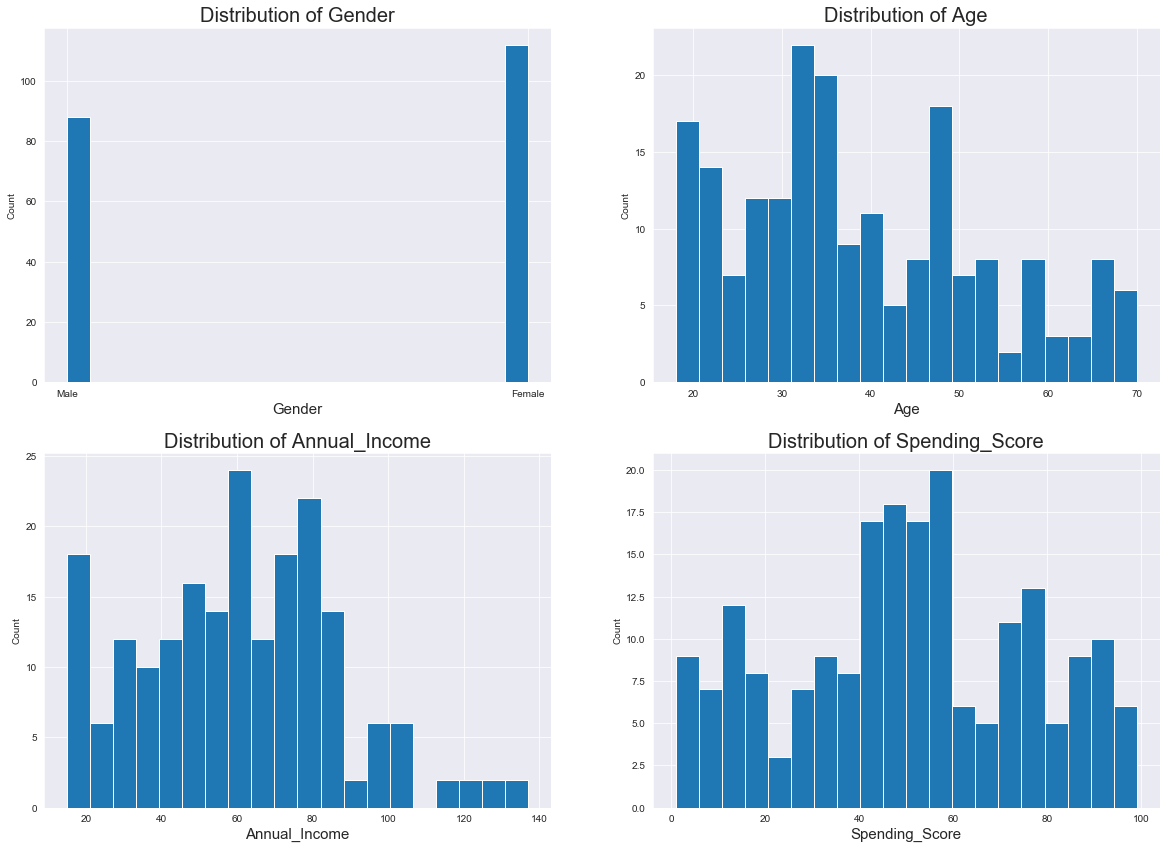

In [332]:
# Visualising the all the columns using histogram plot
nrow = len(df.columns)
ncolumn = 2
subCnt = 1
plt.figure(figsize=(20,30))

for data in df.columns:
    plt.subplot(nrow, ncolumn, subCnt)
    plt.hist(df[data], bins=20)
    plt.title("Distribution of "+data, fontsize=20)
    plt.xlabel(data, fontsize=15)
    plt.ylabel('Count')
    subCnt+=1

plt.show()

In [333]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

# Box Plot

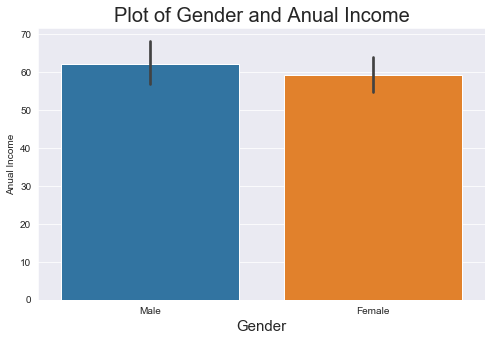

In [334]:
# Visualising the columns 'Gender' and 'Annual income' using Boxplot
plt.figure(figsize=(8,5))
sns.barplot(df.Gender, df.Annual_Income)
plt.title("Plot of Gender and Anual Income", fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Anual Income')
plt.show()

# Count Plot of Gender

Text(0, 0.5, 'Count')

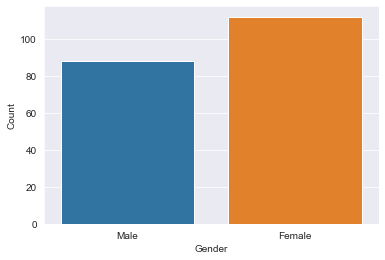

In [335]:
# Visualising the column 'Gender' using Countplot
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')

#### Gender plot - Observation

From the Count plot we observed that the number of Female customers are more that the total number of Male customers.

# Box Plot of Age and Annual Income 

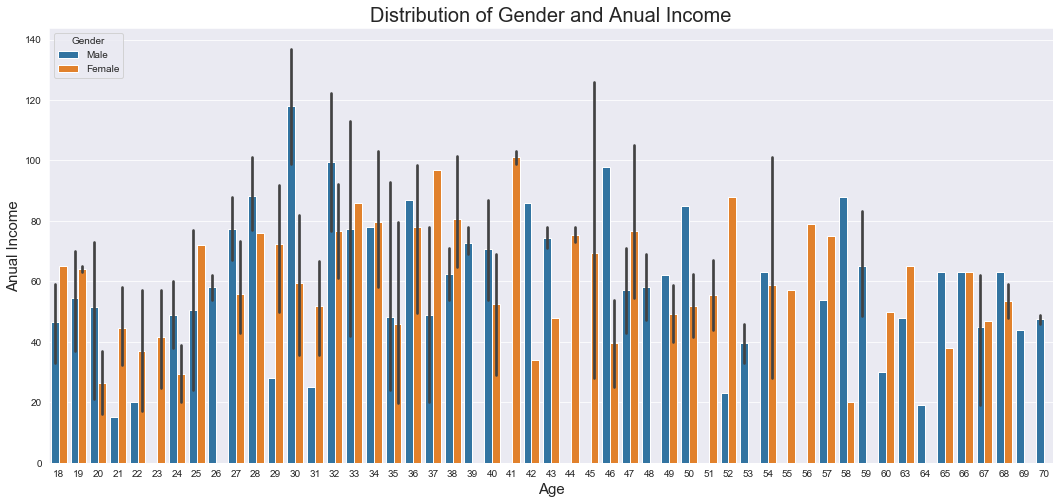

In [336]:
# Visualising the columns 'Gender' using Countplot
plt.figure(figsize=(18,8))
sns.barplot(df.Age, df.Annual_Income, hue=df.Gender)
plt.title("Distribution of Gender and Anual Income", fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Anual Income', fontsize=15)
plt.show()

# Scatter Plot

### Scatter Plot of Age Vs Anual Income

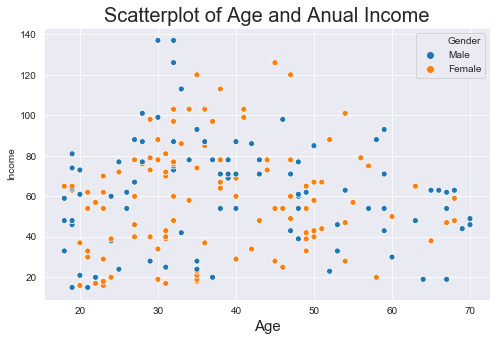

In [337]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Age', y = 'Annual_Income', hue = 'Gender' , data = df)
plt.title("Scatterplot of Age and Anual Income", fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Income')
plt.show()

### Scatter Plot of Age Vs Spending Score(1-100)

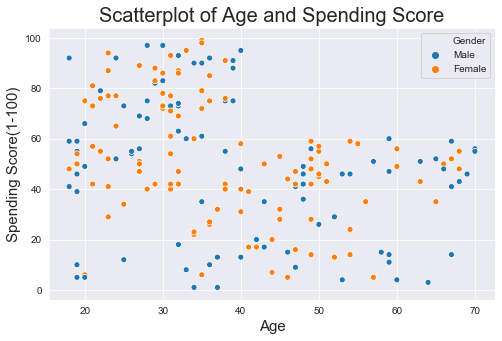

In [338]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Age', y = 'Spending_Score' , hue = 'Gender' , data = df)
plt.title("Scatterplot of Age and Spending Score", fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Spending Score(1-100)', fontsize=15)
plt.show()

### Scatter Plot of Annual Income Vs Spending Score(1-100)

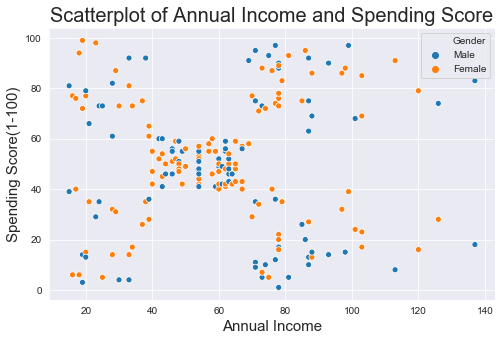

In [339]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score' , hue = 'Gender' , data = df)
plt.title("Scatterplot of Annual Income and Spending Score", fontsize=20)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Spending Score(1-100)', fontsize=15)
plt.show()

Annual Income Vs Spending Score - Observation

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters

We can categoried as:

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

# Data Preprocessing

In [340]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df.iloc[:, [2,3]]

# Feature Scaling

In [341]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Building

### Finding optimal number of clusters using Elbow Method

In [342]:
# Finding num values for 1 to 25 clusters
num = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    num.append(kmeans.inertia_)

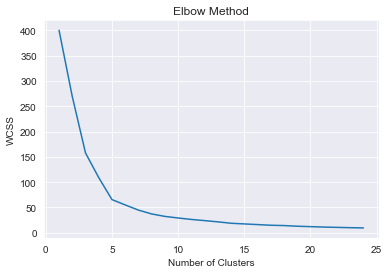

In [343]:
# Plotting the WCSS values
plt.plot(range(1,25), num)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Num')
plt.show()

From the above plot it is observed that 5 is optimal value for the given dataset.

In [346]:
# Training the KMeans model with n_clusters=5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=25)
y_pred = kmeans.fit_predict(X)

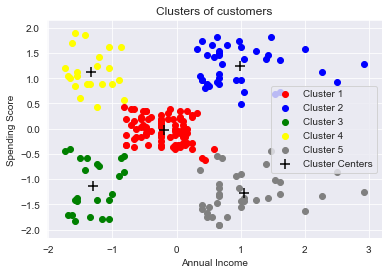

In [347]:
# Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], c = 'grey', label = 'Cluster 5')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Observation

1) Higher Annual Income and Higher Spending Score (Cluster 2) : Spend more time on this costumer by sending new products and latest offers to increase sales.

2) Low Annual Income and Low Spending Score (Cluster 3) : Dont Target this costumers because they have low income.

3) Higher Annual Income and Low Spending Score (Cluster 4) : Target these customers by asking the feedback and advertising the products in a better way to convert them into Cluster 5 customers.

4) Average Annual Income and Average Spending Score (Cluster 1) : Can Target by porviding new offers and less cost EMI's.

5) Low Annual Income and High Spending Score (Cluster 5) : Can be target or not, Dependents on costumer bases policy of the mall.

    